In [24]:
import sys
import cantera as ct
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

import phases
import feedstock as fs
import fuel as fu
import energy as en
import gasifier as gs

In [25]:
sorghum = fs.create_fuel_stream(1, [42.29, 5.74, 37.32, 0.42, 0.07, 0], 0.1416, 0, 19.58)
woodChips = fs.create_fuel_stream(1, [48.32, 6.62, 44.58, 0.14, 0.32, 0], 0.0093, 0, 17.52)
dairyManure = fs.create_fuel_stream(1, [32.8, 2.48, 24.46, 4.16, 0.21, 0], 0.359, 0, 12.3)

In [26]:
TT = np.arange(540, 800+1E-6, 1) # °C
Patm = 101325 # Pa

airWC = fs.create_air_from_ER(woodChips, 0.33)
outletList = []

for i, t in enumerate(TT):
    outlet = gs.gasify_isot(woodChips, airWC, T=t+273.15, P=Patm)
    outletList.append(outlet)

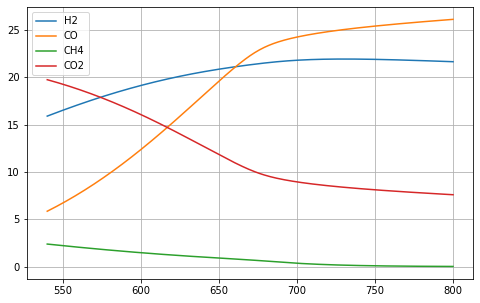

In [27]:
species = ['H2', 'CO', 'CH4', 'CO2']

fig = plt.figure(figsize=(8,5))
for i, sp in enumerate(species):
    plt.plot(TT, [100*out.get_syngas_fraction(sp, water=False, nitrogen=True) for out in outletList], label=sp)
plt.legend()
plt.grid()
plt.show()

In [28]:
char_params = np.array([-111.1574, 3.9705, 0.0362, -7.1958, 3.0419, 1.2430, 0.1276, 1.1034, 1.4281])
methane_params = np.array([16.5264, 0.4982, -0.0304, 0.1739, 0.2148, -0.1864, -0.1186, -0.2192, -0.2552])

def char(ER, MC, T, C, H, O, ash):
    a = lambda i: char_params[i]
    return np.exp(a(0) + a(1)*ER + a(2)*MC + a(3)*((10**(-3))*T) + a(4)*((10**(-3))*T)**2 + a(5)*C + a(6)*H + a(7)*O +a(8)*ash)

def met(ER, MC, T, C, H, O, ash):
    b = lambda i: methane_params[i]
    return np.exp(b(0) + b(1)*ER + b(2)*MC + b(3)*((10**(-3))*T) + b(4)*((10**(-3))*T)**2 + b(5)*C + b(6)*H + b(7)*O +b(8)*ash)

In [29]:
TT = np.arange(740, 800+1E-6, 1) # °C
CO = np.zeros_like(TT)
H2 = np.zeros_like(TT)
CH4 = np.zeros_like(TT)
HV = np.zeros_like(TT)

for i, t in enumerate(TT):
    ch = 1 - (0.1007 + 0.0011*t)
    mt = met(0.35, 0, t+273.15, 42.29, 5.74, 37.32, 14.16)
    outlet = gs.gasify_isot(sorghum, air1, t+273.15, charFormation=ch,  directMethaneConv=mt)
    CO[i] = outlet.get_syngas_fraction('CO')
    H2[i] = outlet.get_syngas_fraction('H2')
    CH4[i] = outlet.get_syngas_fraction('CH4')
    print(CH4[i])
    HV[i] = outlet.get_syngas_hhv('vol', water=True, nitrogen=True)

plt.plot(TT, CO*100, label='CO')
plt.plot(TT, H2*100, label='H2')
plt.plot(TT, CH4*100, label='CH4')
plt.xlim(TT[0], TT[-1])
plt.ylim(0, 30)
plt.legend()
plt.show()

NameError: name 'air1' is not defined